<html>
<head>
  <title>Introduction</title>
  <style>
    h1 {
      color: orange;
    }
    .center {
      margin: auto;
      width: 50%;
      border: 0px;
      padding: 10px;
    }
  </style>
</head>
<body>
    <h1 class="center" >Name: <b>Uday Bhardwaj</b></h1>
    <h1 class="center" >Id: <b>12241910</b></h1>
    <h1 class="center" >Assignment: <b>5</b></h1>
</body>
</html>

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Question 1

## Introduction

- ### We have calculated the least square estimators for $ \alpha \; and \; \beta $ which are A and B respectively by using the formula as follows:
  #### $$ B \; = \; \frac{\sum{} x_i Y_i - n\bar{x}\bar{Y}}{\sum{(x_i)^2} - n\bar{x}^2} $$
  #### $$ A \; = \; \bar{Y} - B\bar{x} $$

- ### The Regression line is interpreted using these A and B as intercept and slope respectively.

- ### Prediction of Moisture Content is done through equation obtained using the regression line.

- ### The Goodness of fit can be easily assesed with the help of a measuring parameter like Mean Squared Error(MSE).

- ### Confidence interval can be assesed by predicting a range for the given value.

### Code

In [2]:
def calculate_least_squares_estimator(x: np.array, y: np.array)->tuple:
  """_Summary_
    This returns the least squares estimator for the given samples of x and y.
  Args:
      x (np.array): This is the numpy array which contains the sample for the relative humidity level.
      y (np.array): This is the numpy array which contains the sample for the moisture content.
  """
  n= len(x)
  B:float = ( np.sum(x*y) - (np.sum(x)*np.sum(y))/n )/ (np.sum(x**2)- (n * ( (np.sum(x)/n)**2) ))
  A:float = np.sum(y)/n - B*np.sum(x)/n

  return (round(A,2), round(B,2) ); 

def interpret_regression_line(slope:float, intercept:float)->None:
  """_summary_
      This interprets the regression line by explaining the slope and the intercept.
  Args:
      slope (float): This is the slope which is calculated as least square estimator.
      intercept (float): This is the intercept obtained from the least Sqaure Estimator.
  """
  print(f"We have taken the least square estimator to get the values of slope and intercept.\nSlope: {slope}, Intercept: {intercept}\nThe significance is that the slope and intercept calculated from Least Sqaure Estimator are unbiased estimator of A and B.", end="\n\n")
  
def predict_moisture_content(slope:float, intercept:float, x:np.array):
  """_summary_
    This helps in predicting the moisture content level with the help of arguments provided.
  Args:
      slope (float): _description_
      intercept (float): _description_
      humidity (np.array): _description_
  """
  y_pr= intercept + slope*x
  return y_pr

def plot_regression_line(slope:float, intercept:float, X:np.array, Y:np.array ):
  """_summary_

  Args:
      slope (float): _description_
      intercept (float): _description_
      x (np.array): _description_
      y (np.array): _description_
  """
  X_data= np.array( [ 0.08* i for i in range(1000)] )
  Y_data= X_data*slope + intercept

  plt.figure( figsize=(10,8) )
  plt.style.use('seaborn-v0_8')
  plt.title("Regression line vs actual data")
  plt.xlabel('Relative Humidity'); plt.ylabel('Moisture Content')

  # Plotting the scatterplot values
  plt.scatter(X,Y, linewidths=2, edgecolors='black' )
  plt.scatter(X_data, Y_data, linewidths=10e-9, edgecolors='red', marker=".")
  plt.show()

def assess_goodness_of_fit(y:np.array, y_predict:np.array):
  """_summary_

  Args:
      y (np.array): This is the original moisture content level given in the question. 
      y_predict (np.array): This is the predicted moisture content level given in the question.
  """
  ans:float= sum( (y_predict-y)**2 )
  return round(ans, 2), round( ans/len(y), 2)

def compute_confidence_interval(humidity, size, mean, SSE, Sxx, slope, intercept  ):
  """_summary_
  """
  range_:float = np.sqrt( ( ((1+size)/size) + ((humidity-mean)**2)/Sxx) * (SSE/(size-2)))
  t_val= stats.t.ppf(.975, size-2)
  org_val= slope*humidity + intercept

  print(f"The range is between {round(org_val - range_*t_val,2)} and {round(org_val + range_*t_val, 2)} with 95% confidence interval")
  

The Slope and the Variance of the regression line are -2.51 and 0.32 respectively.

We have taken the least square estimator to get the values of slope and intercept.
Slope: 0.32, Intercept: -2.51
The significance is that the slope and intercept calculated from Least Sqaure Estimator are unbiased estimator of A and B.

The predicted Moisture for the Humidity is:
[12.21 14.45  6.77 17.01  9.01  9.97 12.53 13.17 14.13  9.65 15.09  7.73
 15.73 14.77 11.57]

The plot of the regression line and the actual data provided is given as follows:


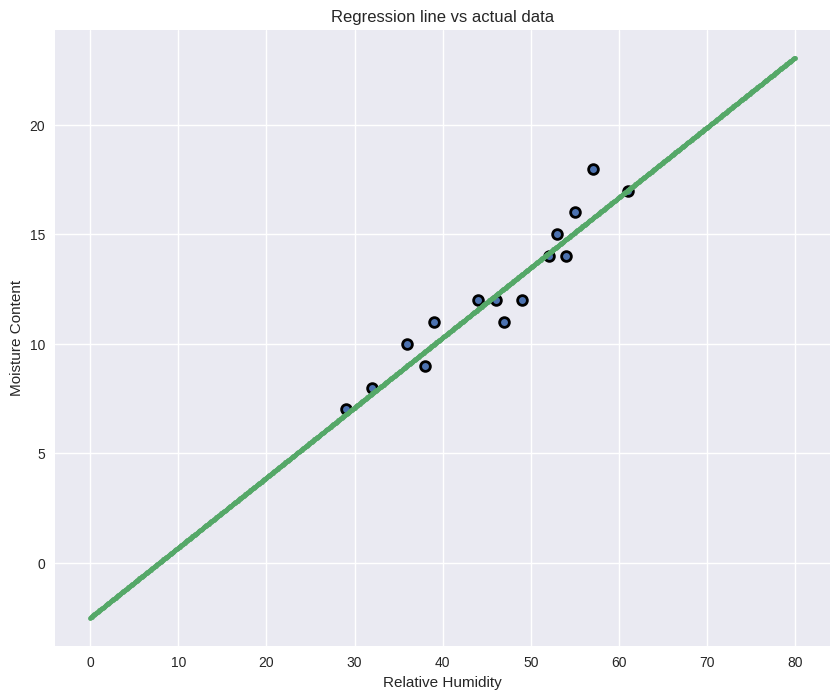

The Sum of Squared Error is 13.42 and the Mean of Sqaured Error is 0.89. The smaller the values of SSE and MSE, the better the line fits.

69.2
The range is between 2.07 and 8.91 with 95% confidence interval


In [6]:
Humidity= np.array( [46, 53, 29, 61, 36, 39, 47, 49, 52, 38, 55, 32, 57, 54, 44] )
Moisture_org= np.array( [12, 15, 7, 17, 10, 11, 11, 12, 14, 9, 16, 8, 18, 14, 12] )

intercept, slope= calculate_least_squares_estimator(x=Humidity, y=Moisture_org )
print(f"The Slope and the Variance of the regression line are {intercept} and {slope} respectively.", end="\n\n")
interpret_regression_line( slope, intercept )

Moisture_predict= predict_moisture_content(slope=slope, intercept=intercept, x=Humidity)
print(f"The predicted Moisture for the Humidity is:\n{Moisture_predict}", end="\n\n")

print(f"The plot of the regression line and the actual data provided is given as follows:")
plot_regression_line(slope, intercept, Humidity, Moisture_org)

SSE, MSE= assess_goodness_of_fit( Moisture_org, Moisture_predict )
print(f"The Sum of Squared Error is {SSE} and the Mean of Sqaured Error is {MSE}. The smaller the values of SSE and MSE, the better the line fits.",end="\n\n")

mean1= np.sum( Humidity )/10
Sxx= np.sum( np.array( [ (val-mean1)**2  for val in Humidity] ) )
print(mean1)
Sample1= 25
compute_confidence_interval(Sample1, 10, mean1, SSE, Sxx, slope, intercept )

### Observations

- #### We can see above that not all data points align with the regression line. This is again due to the residual which is present. This can also be pertained to the irreducable error.

- #### The range for the 95% confidence interval choosen also matches with the values of the regression line.

## Question 2

### Methodology

- #### We have calculated the least square estimators for $ \alpha \; and \; \beta $ which are A and B respectively by using the formula as follows:
  ##### $$ B \; = \; \frac{\sum{} x_i Y_i - n\bar{x}\bar{Y}}{\sum{(x_i)^2} - n\bar{x}^2} $$

- #### Prediction of Score is done through equation obtained by using the time of study, slope and intercept.

- #### During the Hypothesis testing, we take the following hypothesis:
  ##### $$ H_0: \beta=0 \; \; H_1: \beta>0 $$

- #### The Hypothesis $ H_0 $ point out that the Score in Exam is completely independent of the number of hours put in study.
- #### Initutively, This is not the case. We will prove this by Hypothesis and rejecting the Null Hypothesis.

### Code

In [4]:
def calculate_slope_intercept( x: np.array, y: np.array )->tuple:

  n= len(x)
  B:float = ( np.sum(x*y) - (np.sum(x)*np.sum(y))/n )/ (np.sum(x**2)- (n * ( (np.sum(x)/n)**2) ))
  A:float = np.sum(y)/n - B*np.sum(x)/n

  return ( round(A,2), round(B,2) ); 

def vis_relationship( X:np.array, Y:np.array, slope, intercept ):

  X_data= np.array( [ 0.08* i for i in range(400)] )
  Y_data= X_data*slope + intercept

  plt.figure( figsize=(10,8) )
  plt.style.use('seaborn-v0_8')
  plt.title("Actual data plotted")
  plt.xlabel('Time'); plt.ylabel('Score')

  # Plotting the scatterplot values
  plt.scatter(X,Y, linewidths=2, edgecolors='black' )
  plt.scatter(X_data, Y_data, linewidths=10e-9, edgecolors='red', marker=".")
  
  plt.show()


def predict_exam_score( Time:float, slope:float, intercept:float )->float:
  
  Score= Time*slope + intercept
  return Score

def plot_residual(Time, Score, slope, intercept):
  
  residual= Score - ( Time*slope + intercept )


  plt.figure(figsize=(10,8))
  plt.style.use( 'seaborn-v0_8' )
  plt.xlabel('Study Time'); plt.ylabel('Residual')
  plt.scatter(x=Time, y=residual )

  return residual

def hypothesis_test(slope, size, Sxx, SSE):
  
  coeff= np.sqrt( (size-2)* Sxx/SSE)
  test_stat= slope * coeff
  t_stat= stats.t.ppf( 0.975, size-2 )

  return round(test_stat, 2), round(t_stat, 2)


The Slope and the Variance of the regression line are -2.51 and 0.32 respectively.



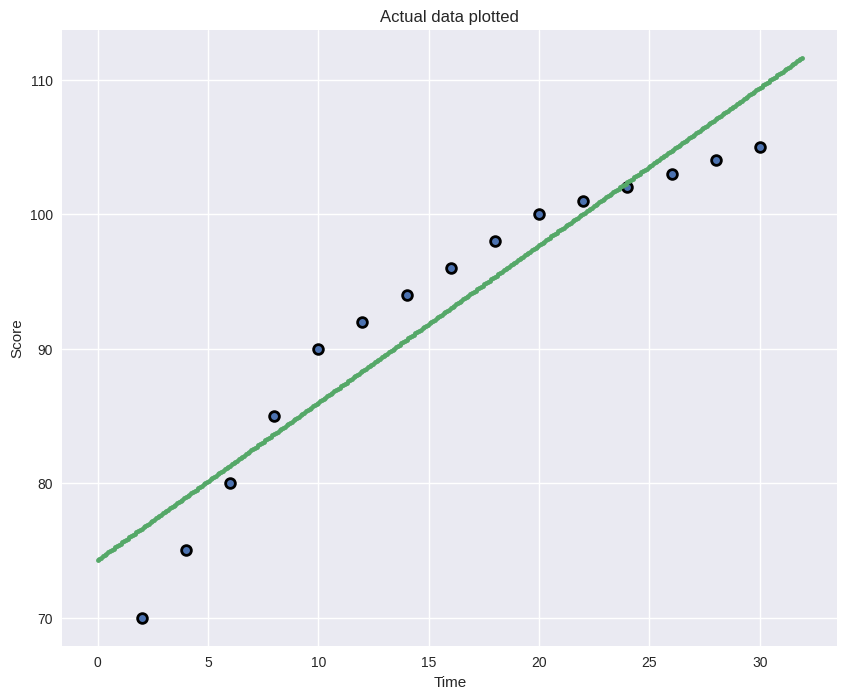

The Predicted score for the study time of 23 is 101.2.

We can see from the above graph that the distribution of the residuals first increases and then decreases. This could lead us to the hypothesis that Studying for less hours or too much greater hours does not lead to a well-defined distribution of marks.

The Test-Statistic and the t-Statistic have come out to be 86.97 and 2.31. As We can see that the test Statistic is greater than the t-statistic, We can reject the hypothesis that β=0 i.e. the Test score are completely independent of the hours studied for the test.



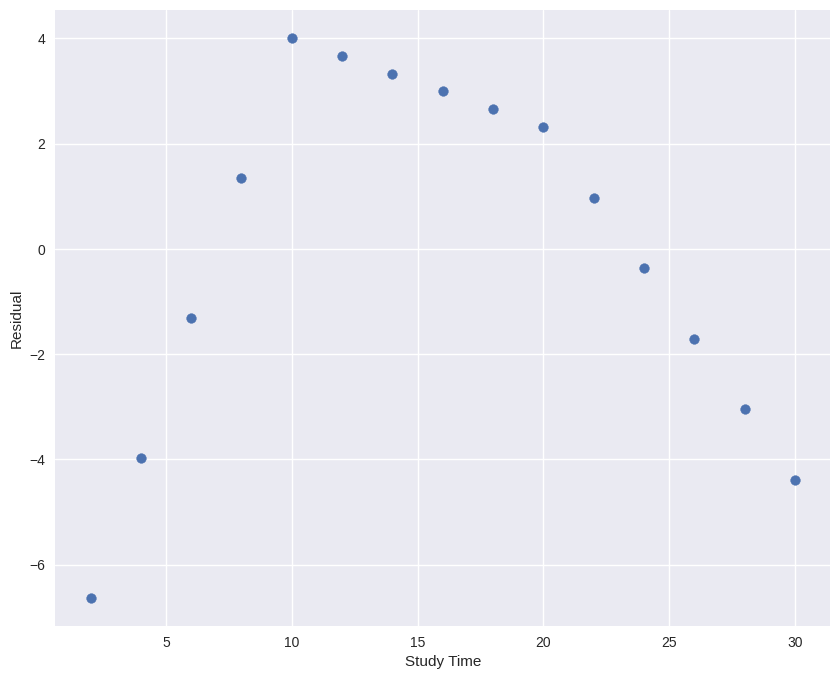

In [5]:
Time= np.array( [ 2 ,4 ,6 ,8 ,10 ,12 ,14 ,16 ,18 ,20 ,22 ,24 ,26 ,28 ,30 ] )
Score= np.array( [ 70, 75, 80, 85, 90, 92, 94, 96, 98, 100, 101, 102, 103, 104, 105 ] )

intercept2, slope2= calculate_slope_intercept(x=Time, y=Score )
print(f"The Slope and the Variance of the regression line are {intercept} and {slope} respectively.", end="\n\n")

vis_relationship(X= Time, Y= Score, slope=slope2, intercept=intercept2)

sample_value= 23
predicted_score= predict_exam_score(Time= sample_value, slope=slope2, intercept= intercept2)
print(f"The Predicted score for the study time of {sample_value} is {predicted_score}.", end="\n\n")

Residuals= plot_residual(Time, Score, slope2, intercept2)
print(f"We can see from the above graph that the distribution of the residuals first increases and then decreases. This could lead us to the hypothesis that Studying for less hours or too much greater hours does not lead to a well-defined distribution of marks.",end="\n\n")

test_stat, t_stat= hypothesis_test(slope2, 10, Sxx, SSE)
print(f"The Test-Statistic and the t-Statistic have come out to be {test_stat} and {t_stat}. As We can see that the test Statistic is greater than the t-statistic, We can reject the hypothesis that β=0 i.e. the Test score are completely independent of the hours studied for the test.", end="\n\n")

### Observations

- #### The Scatter plot with the Study time vs Residual describes a curve which first increase and then decreases.

- #### We can see from the above graph that the distribution of the residuals first increases and then decreases. 

- #### This could lead us to the hypothesis that Studying for less hours or too much greater hours does not lead to a well-defined distribution of marks. Through this, we reject the Null Hypothesis.